In [15]:
pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.


In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import math


# Construct the relative path to the CSV file
file_path = os.path.join('..', '..', 'Output', 'Simulation', 'sim_comparison.csv')

# Load the CSV file
df = pd.read_csv(file_path)
# Renaming columns
df.rename(columns={'Unnamed: 0' : 'WMU', 'Mean_estimated_Density':'Mean estimated Density', 'True_Density':'True Density','Mean_relative_Estimate': 'Relative mean estimate', 'Percent_Bias': 'Bias (%)', 'RRMSE': 'Relative RMSE', 'CI_Coverage_Prob': 'Probortion 95% CI', 'Mean_SE': 'Mean se', 'CV': 'Coefficient of variation', 'Mean_ER': 'Mean encounter rate', 'Mean_se_ER': 'Mean standard error ER'}, inplace=True)

# Remove the iteration number and keep only the first 6 characters
df['WMU'] = df['WMU'].str.slice(0, 6)

# Dictionary to map old simulation names to new ones
simulation_rename_dict = {
    'H-SG': 'H-SG',
    'Rnd': 'Rnd',
    'Sys': 'Sys',
    'ZZ': 'ZZ',
    'ZZC': 'ZZC',
    'FW-Sys_2C': 'FW-Sys 2C',
    'FW-ZZ_2C': 'FW-ZZ 2C',
    'FW-Sys_G': 'FW-Sys G',
    'FW-ZZ_G': 'FW-ZZ G',
    'QC-Sys': 'QC-Sys'
}
# Renaming the simulations
df['Simulation'] = df['Simulation'].replace(simulation_rename_dict)



In [2]:
# Display the first few rows of the dataframe
print(df)
print(df.columns)

       WMU Simulation  Mean estimated Density  True Density  \
0   WMU501       H-SG                   0.193         0.194   
1   WMU501        Rnd                   0.194         0.194   
2   WMU501        Sys                   0.192         0.194   
3   WMU501         ZZ                   0.193         0.194   
4   WMU501        ZZC                   0.193         0.194   
5   WMU501  FW-Sys 2C                   0.202         0.203   
6   WMU501   FW-ZZ 2C                   0.202         0.203   
7   WMU501   FW-Sys G                   0.203         0.203   
8   WMU501    FW-ZZ G                   0.203         0.203   
9   WMU501     QC-Sys                   0.181         0.207   
10  WMU503       H-SG                   0.406         0.410   
11  WMU503        Rnd                   0.408         0.410   
12  WMU503        Sys                   0.406         0.410   
13  WMU503         ZZ                   0.408         0.410   
14  WMU503        ZZC                   0.407         0

C:\Users\lhambrec\AppData\Local\Temp\ipykernel_33424\3887831233.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Simulation', y=column, data=df, ax=axes[i], palette=palette)
C:\Users\lhambrec\AppData\Local\Temp\ipykernel_33424\3887831233.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Simulation', y=column, data=df, ax=axes[i], palette=palette)
C:\Users\lhambrec\AppData\Local\Temp\ipykernel_33424\3887831233.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Simulation', y=column, data=df, ax=axes[i], palette=palette)
C:\U

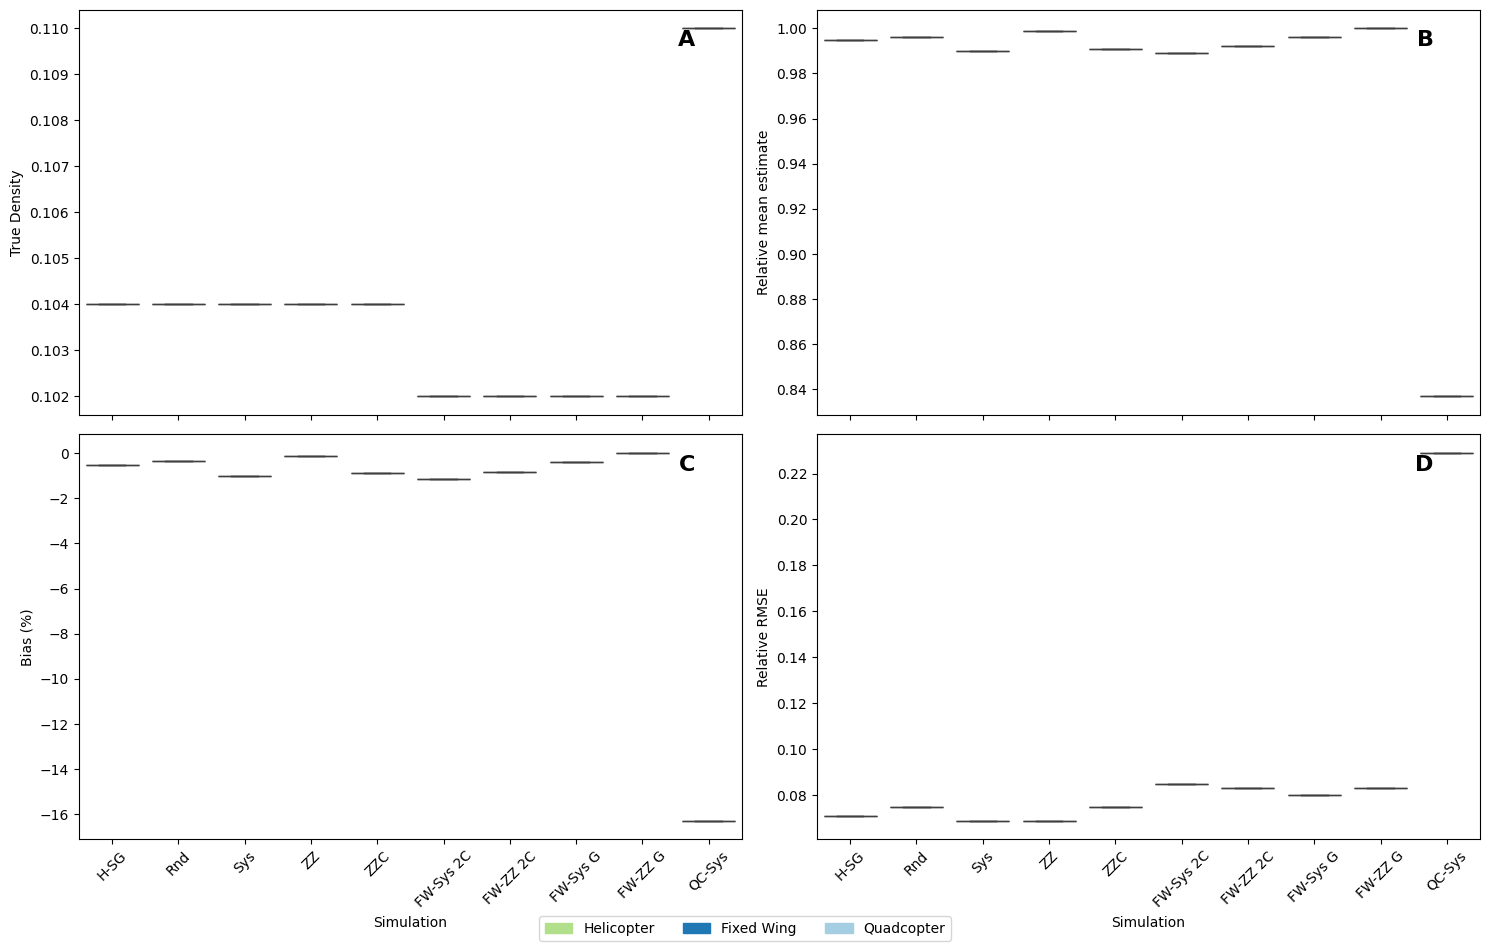

In [18]:
# List of column indices to plot (0-based index)
columns_to_plot = [3, 4, 5, 6]  # Example: columns 4-6

# Number of columns to plot
num_columns = len(columns_to_plot)

# Calculate the number of rows and columns for the subplots
ncols = 2
nrows = math.ceil(num_columns / ncols)

# Create a figure and a set of subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Define a function to assign colors based on 'Simulation' values
def get_color(simulation):
    if simulation.startswith('FW'):
        return '#1f78b4'
    elif simulation.startswith('QC'):
        return '#a6cee3'
    else:
        return '#b2df8a'

# Letters to annotate subplots
letters = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'

# Loop through each specified column in the DataFrame
for i, col_index in enumerate(columns_to_plot):
    column = df.columns[col_index]
    
    # Create a color palette based on the 'Simulation' column
    palette = {sim: get_color(sim) for sim in df['Simulation'].unique()}
    
    sns.boxplot(x='Simulation', y=column, data=df, ax=axes[i], palette=palette)

    # Add letter annotation in the top right corner
    axes[i].text(0.93, 0.95, letters[i], transform=axes[i].transAxes, 
                 fontsize=16, fontweight='bold', va='top', ha='right')
    
    # Add title and labels
    # axes[i].set_title(f'Boxplot of {column} by Simulation')
    axes[i].set_ylabel(column)
    
    # Rotate x-axis labels
    axes[i].tick_params(axis='x', rotation=45)
    
    # Hide x-axis labels for all but the last row of subplots
    if i < (nrows - 1) * ncols:
        axes[i].set_xlabel('')
        axes[i].set_xticklabels([])

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Create custom legend handles
legend_handles = [
    Patch(color='#b2df8a', label='Helicopter'),
    Patch(color='#1f78b4', label='Fixed Wing'),
    Patch(color='#a6cee3', label='Quadcopter')    
]

# Add the legend to the figure
fig.legend(handles=legend_handles, loc='lower center', ncol=3)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust rect to make space for the legend

# Show the plot
plt.show()

C:\Users\lhambrec\AppData\Local\Temp\ipykernel_64224\527229856.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Simulation', y=column, data=df, ax=axes[i], palette=palette)
C:\Users\lhambrec\AppData\Local\Temp\ipykernel_64224\527229856.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Simulation', y=column, data=df, ax=axes[i], palette=palette)
C:\Users\lhambrec\AppData\Local\Temp\ipykernel_64224\527229856.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Simulation', y=column, data=df, ax=axes[i], palette=palette)
C:\User

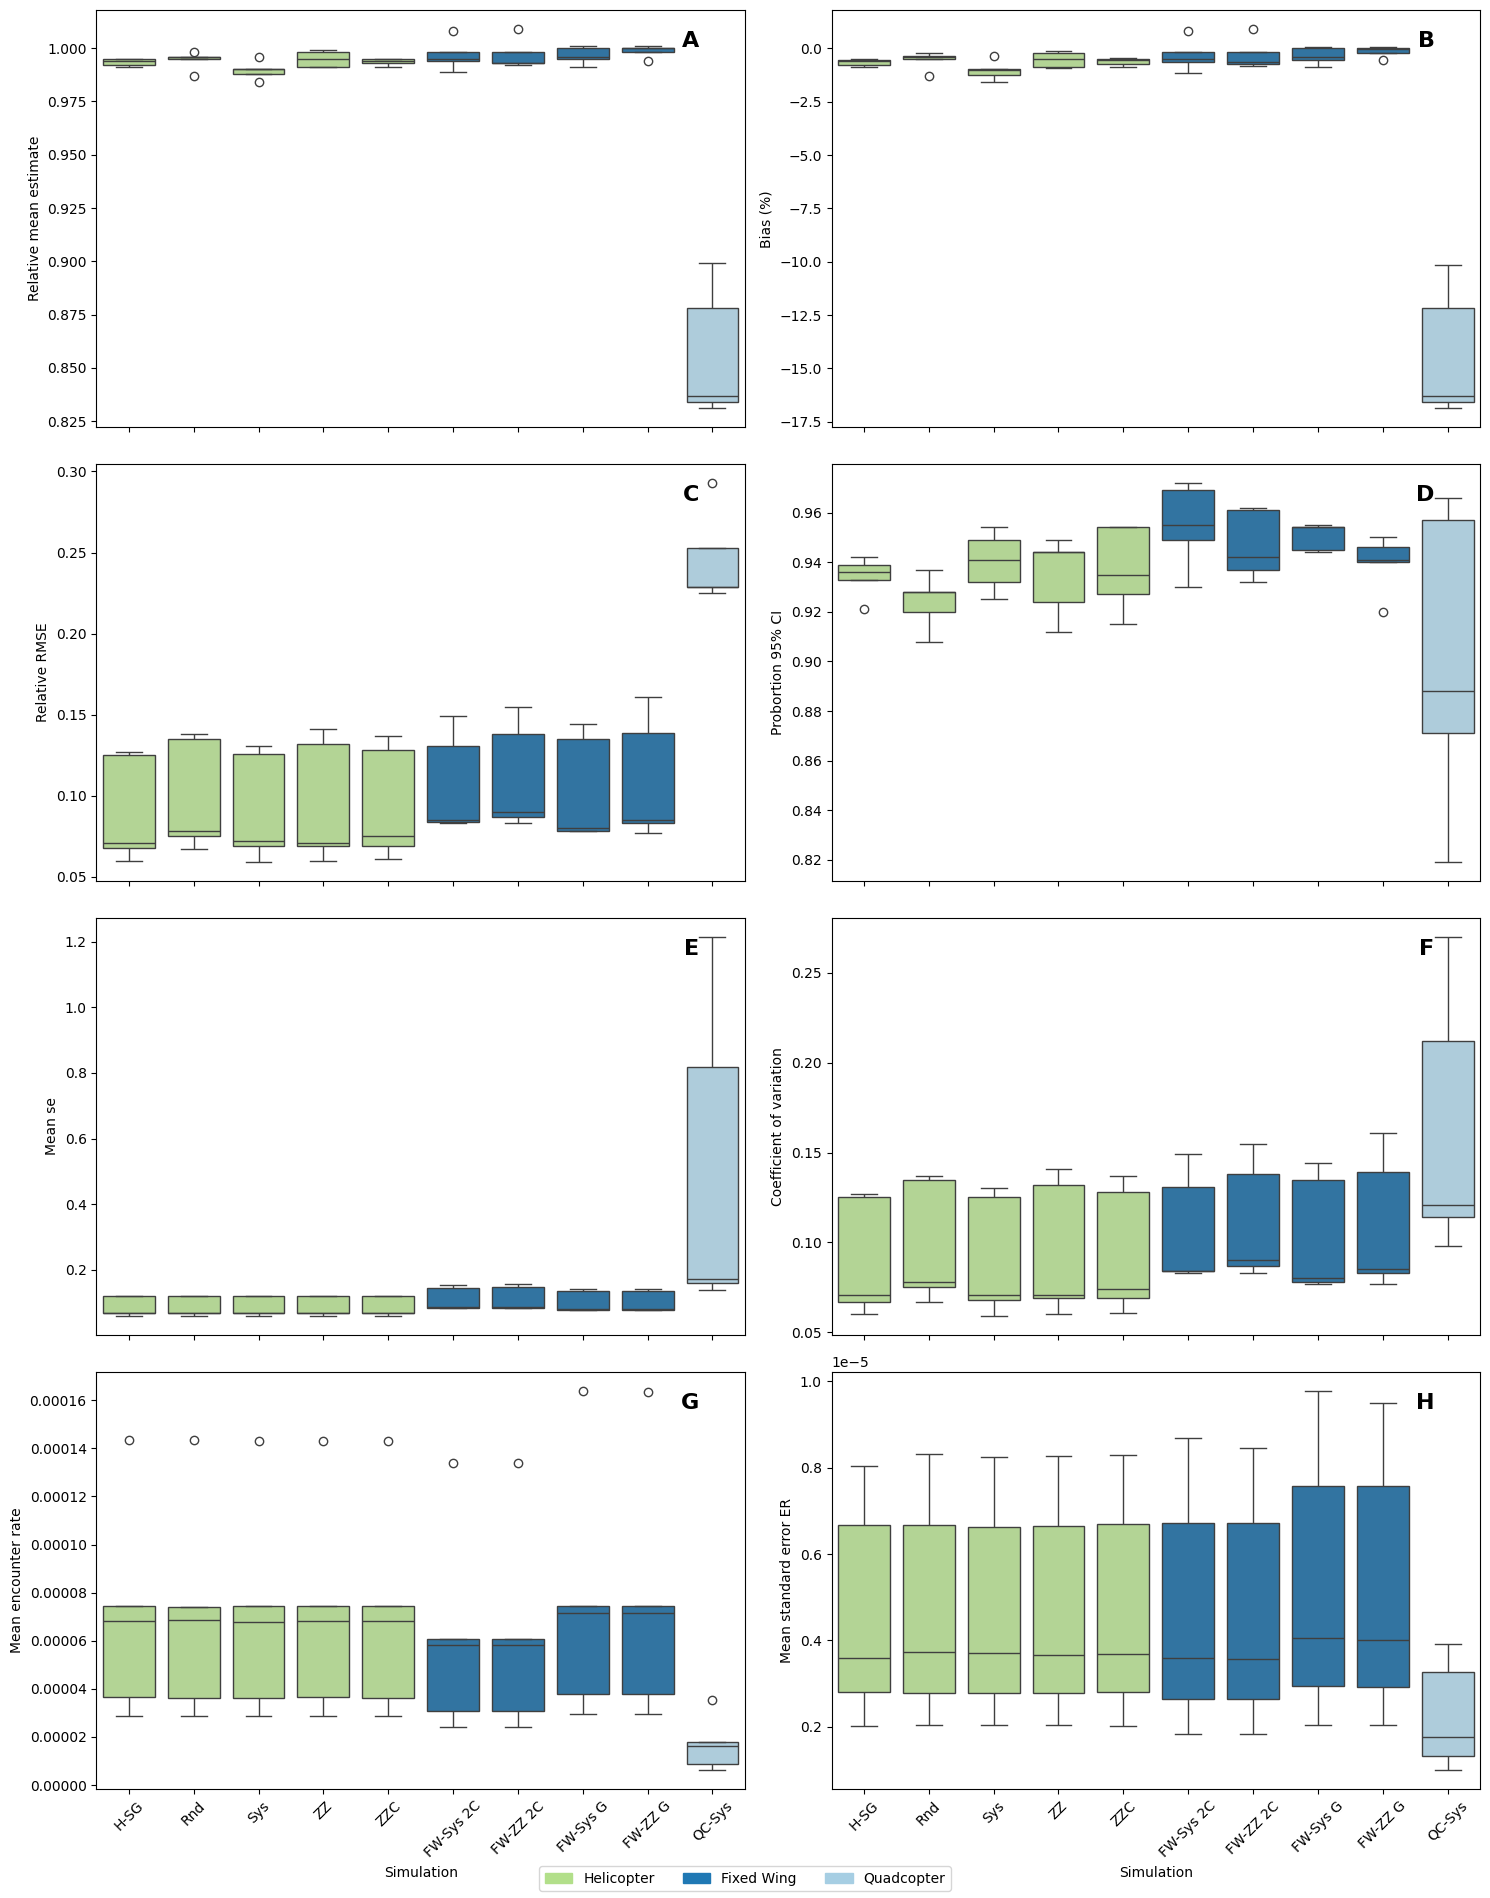

In [3]:

# List of column indices to plot (0-based index)
columns_to_plot = [4,5,6,7,8,9,10,11]  # Example: columns 4-6# List of column indices to plot (0-based index)

# Number of columns to plot
num_columns = len(columns_to_plot)

# Calculate the number of rows and columns for the subplots
ncols = 2
nrows = math.ceil(num_columns / ncols)

# Create a figure and a set of subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Define a function to assign colors based on 'Simulation' values
def get_color(simulation):
    if simulation.startswith('FW'):
        return '#1f78b4'
    elif simulation.startswith('QC'):
        return '#a6cee3'
    else:
        return '#b2df8a'

# Letters to annotate subplots
letters = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'

# Loop through each specified column in the DataFrame
for i, col_index in enumerate(columns_to_plot):
    column = df.columns[col_index]
    
    # Create a color palette based on the 'Simulation' column
    palette = {sim: get_color(sim) for sim in df['Simulation'].unique()}
    
    sns.boxplot(x='Simulation', y=column, data=df, ax=axes[i], palette=palette)

    # Add letter annotation in the top right corner
    axes[i].text(0.93, 0.95, letters[i], transform=axes[i].transAxes, 
                 fontsize=16, fontweight='bold', va='top', ha='right')
    
    # Add title and labels
    # axes[i].set_title(f'Boxplot of {column} by Simulation')
    axes[i].set_ylabel(column)
    
    # Rotate x-axis labels
    axes[i].tick_params(axis='x', rotation=45)
    
    # Hide x-axis labels for all but the last row of subplots
    if i < (nrows - 1) * ncols:
        axes[i].set_xlabel('')
        axes[i].set_xticklabels([])

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Create custom legend handles
legend_handles = [
    Patch(color='#b2df8a', label='Helicopter'),
    Patch(color='#1f78b4', label='Fixed Wing'),
    Patch(color='#a6cee3', label='Quadcopter')    
]

# Add the legend to the figure
fig.legend(handles=legend_handles, loc='lower center', ncol=3)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust rect to make space for the legend

# Show the plot
plt.show()

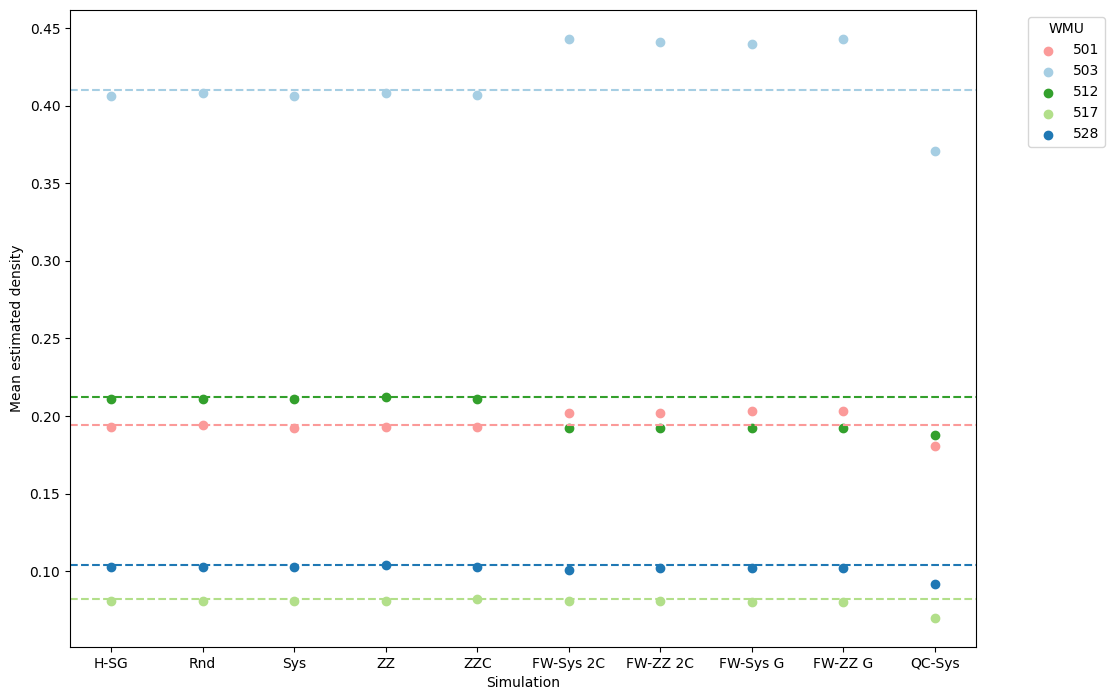

In [4]:
# Predefined colors for each WMU
wmu_colors = {
    'WMU501': '#fb9a99',   # Pink
    'WMU503': '#a6cee3',  # light Blue
    'WMU512': '#33a02c',  # Green
    'WMU517': '#b2df8a',  # light Green
    'WMU528': '#1f78b4'  # Blue
}

# Custom legend labels
wmu_labels = {
    'WMU501': '501',
    'WMU503': '503',
    'WMU512': '512',
    'WMU517': '517',
    'WMU528': '528'
}

# Plotting
fig, ax = plt.subplots(figsize=(11.69, 8.27))  # A4 size in landscape orientation

# Group by WMU and plot each group
for key, grp in df.groupby('WMU'):
    color = wmu_colors.get(key, '#000000')  # Default to black if WMU not found
    label = wmu_labels.get(key, key)  # Use custom label if available, otherwise use key
    ax.scatter(grp['Simulation'], grp['Mean estimated Density'], label=label, color=color)
    true_density = grp['True Density'].iloc[0]  # Assuming True Density is the same for each group
    ax.axhline(y=true_density, linestyle='--', color=color, label='_nolegend_')

# Adding labels and title
ax.set_xlabel('Simulation')
ax.set_ylabel('Mean estimated density')
# ax.set_title('Scatter Plot of Simulation vs Mean estimated Density')
# Place legend outside the plot
ax.legend(title='WMU', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.show()

In [25]:
# Construct the relative path to the CSV file
file_path = os.path.join('..', '..', 'Output', 'Simulation', 'density_sim_comparison.csv')

# Load the CSV file
df = pd.read_csv(file_path)
# Renaming columns
df.rename(columns={'Unnamed: 0' : 'ID', 'WMU':'WMU', 'Density':'Density','Simulation':'Simulation', 'Mean_estimated_Density':'Mean estimated Density', 'True_Density':'True Density','Mean_relative_Estimate': 'Relative mean estimate', 'Percent_Bias': 'Bias (%)', 'RRMSE': 'Relative RMSE', 'CI_Coverage_Prob': 'Probortion 95% CI', 'Mean_SE': 'Mean se', 'CV': 'Coefficient of variation', 'Mean_ER': 'Mean encounter rate', 'Mean_se_ER': 'Mean standard error ER'}, inplace=True)

# Remove the iteration number and keep only the first 6 characters
# df['WMU'] = df['WMU'].str.slice(0, 6)

# Dictionary to map old simulation names to new ones
simulation_rename_dict = {
    'H-SG': 'H-SG',
    'FW-Sys_G': 'FW-Sys G',
    'QC-Sys': 'QC-Sys'
}
# Renaming the simulations
df['Simulation'] = df['Simulation'].replace(simulation_rename_dict)


In [26]:
# Display the first few rows of the dataframe
print(df)
print(df.columns)

                  ID  WMU  Density Simulation  Mean estimated Density  \
0   WMU503_D0.0.25.1  503     0.25       H-SG                   0.101   
1   WMU503_D0.0.25.2  503     0.25   FW-Sys G                   0.120   
2   WMU503_D0.0.25.3  503     0.25     QC-Sys                   0.121   
3    WMU503_D0.0.5.1  503     0.50       H-SG                   0.201   
4    WMU503_D0.0.5.2  503     0.50   FW-Sys G                   0.237   
5    WMU503_D0.0.5.3  503     0.50     QC-Sys                   0.224   
6   WMU503_D0.0.75.1  503     0.75       H-SG                   0.299   
7   WMU503_D0.0.75.2  503     0.75   FW-Sys G                   0.352   
8   WMU503_D0.0.75.3  503     0.75     QC-Sys                   0.327   
9   WMU517_D0.0.25.1  517     0.25       H-SG                   0.020   
10  WMU517_D0.0.25.2  517     0.25   FW-Sys G                   0.023   
11  WMU517_D0.0.25.3  517     0.25     QC-Sys                   0.023   
12   WMU517_D0.0.5.1  517     0.50       H-SG      

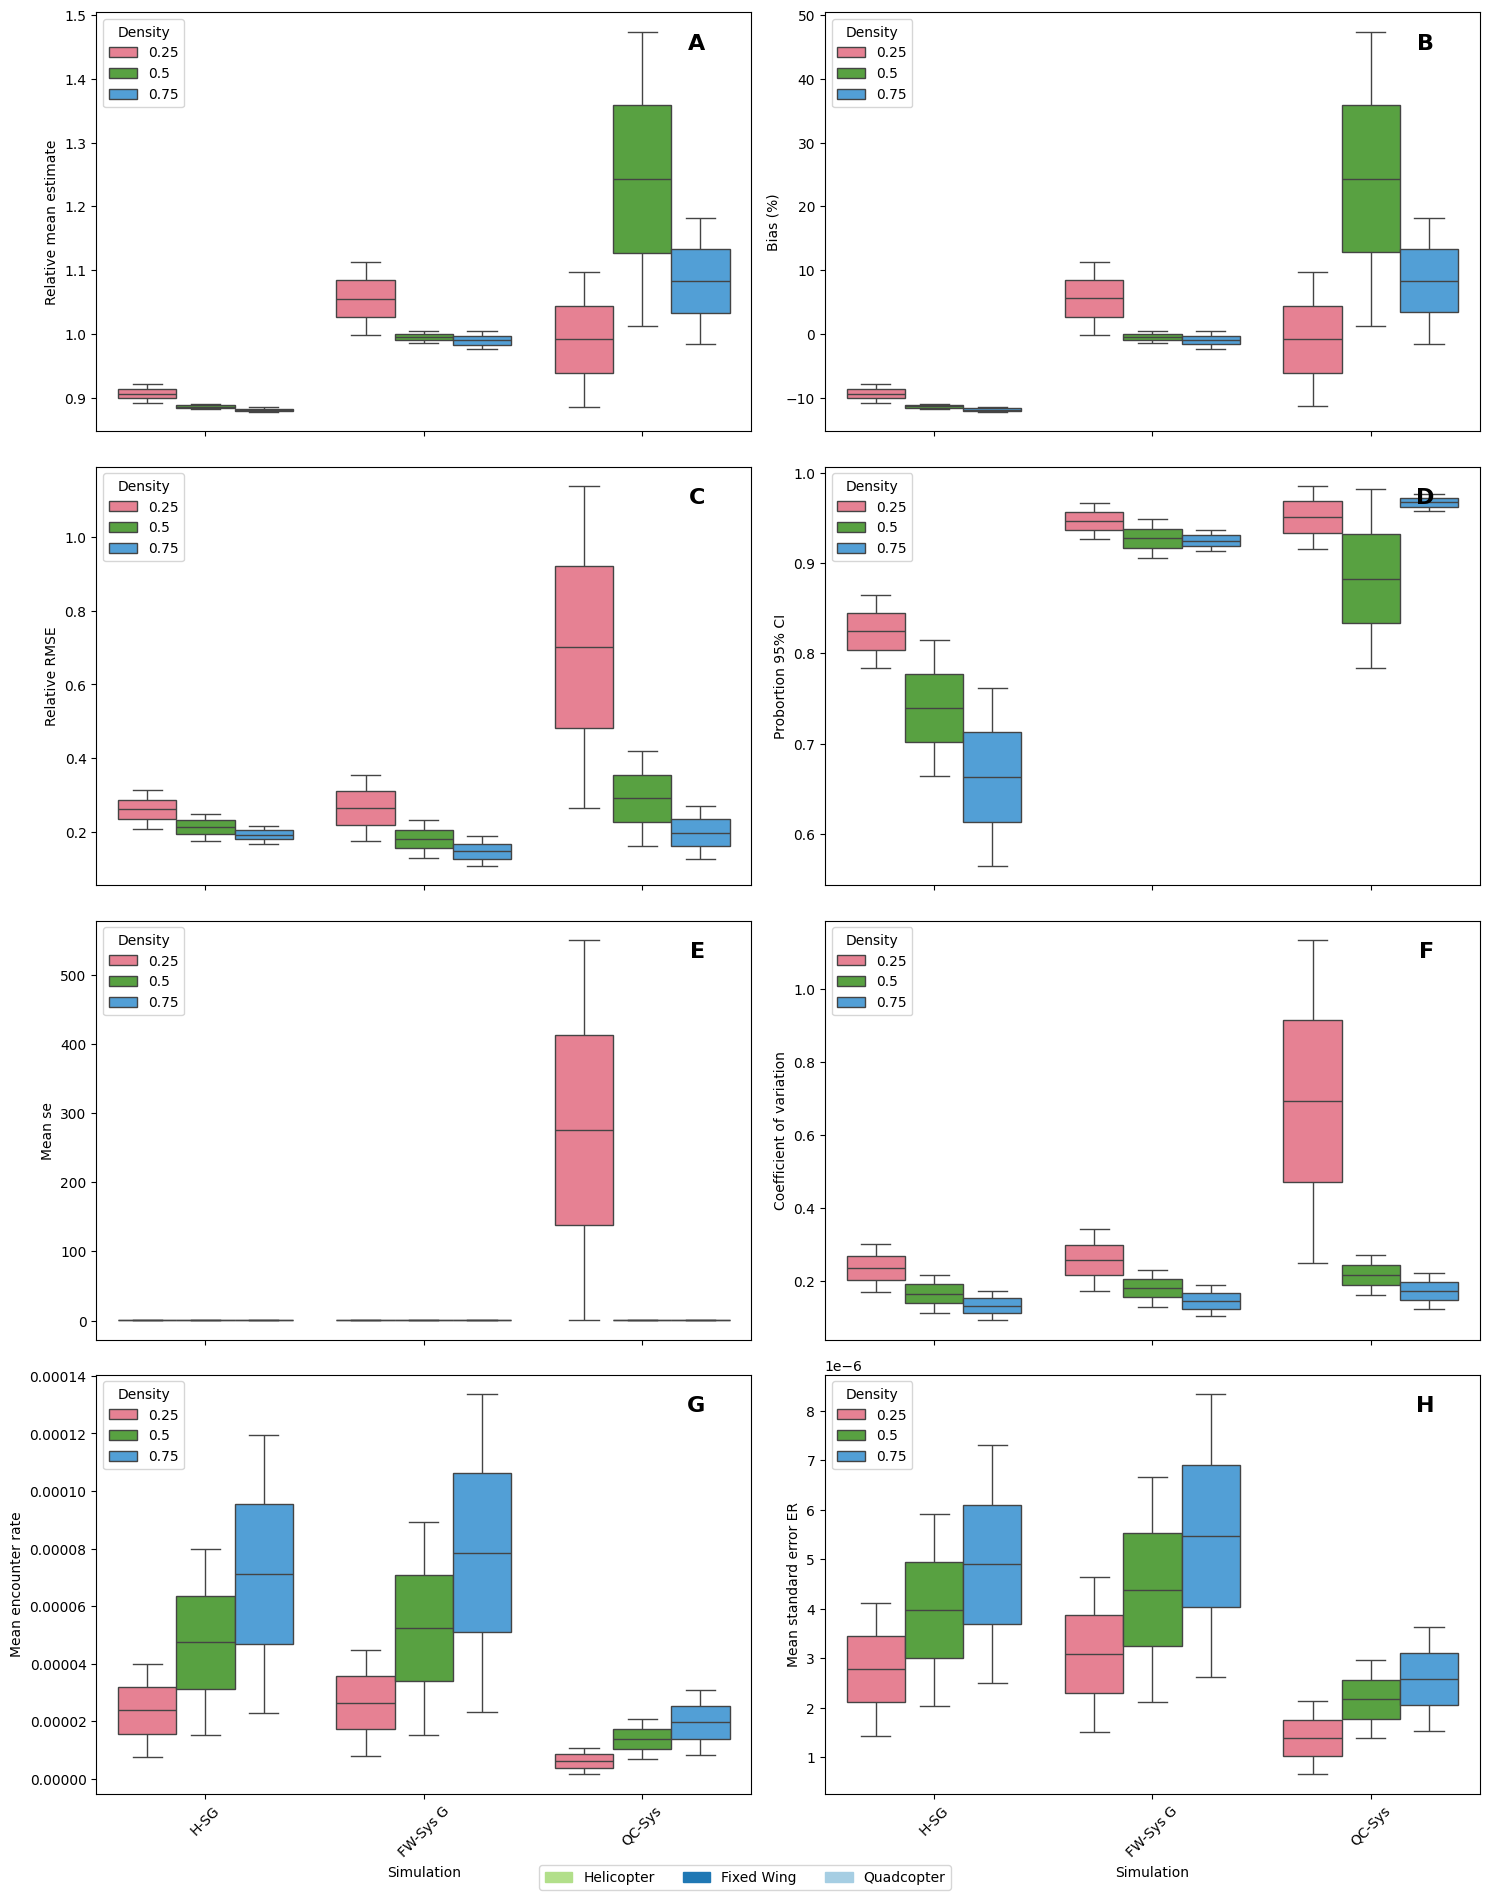

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import math
from matplotlib.patches import Patch

# List of column indices to plot (0-based index)
columns_to_plot = [6, 7, 8, 9, 10, 11, 12,13]  # Example: columns 4-6

# Number of columns to plot
num_columns = len(columns_to_plot)

# Calculate the number of rows and columns for the subplots
ncols = 2
nrows = math.ceil(num_columns / ncols)

# Create a figure and a set of subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Define a function to assign colors based on 'Simulation' values
def get_color(simulation):
    if simulation.startswith('FW'):
        return '#1f78b4'
    elif simulation.startswith('QC'):
        return '#a6cee3'
    else:
        return '#b2df8a'

# Letters to annotate subplots
letters = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'

# Create a color palette for the 'Density' column
density_palette = sns.color_palette("husl", len(df['Density'].unique()))
density_palette = {density: color for density, color in zip(df['Density'].unique(), density_palette)}

# Loop through each specified column in the DataFrame
for i, col_index in enumerate(columns_to_plot):
    column = df.columns[col_index]
    
    # Create a color palette based on the 'Simulation' column
    palette = {sim: get_color(sim) for sim in df['Simulation'].unique()}
    
    sns.boxplot(x='Simulation', y=column, hue='Density', data=df, ax=axes[i], palette=density_palette)

    # Add letter annotation in the top right corner
    axes[i].text(0.93, 0.95, letters[i], transform=axes[i].transAxes, 
                 fontsize=16, fontweight='bold', va='top', ha='right')
    
    # Add title and labels
    # axes[i].set_title(f'Boxplot of {column} by Simulation')
    axes[i].set_ylabel(column)
    
    # Rotate x-axis labels
    axes[i].tick_params(axis='x', rotation=45)
    
    # Hide x-axis labels for all but the last row of subplots
    if i < (nrows - 1) * ncols:
        axes[i].set_xlabel('')
        axes[i].set_xticklabels([])

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Create custom legend handles for 'Simulation'
legend_handles = [
    Patch(color='#b2df8a', label='Helicopter'),
    Patch(color='#1f78b4', label='Fixed Wing'),
    Patch(color='#a6cee3', label='Quadcopter')    
]

# Add the legend to the figure
fig.legend(handles=legend_handles, loc='lower center', ncol=3)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust rect to make space for the legend

# Show the plot
plt.show()

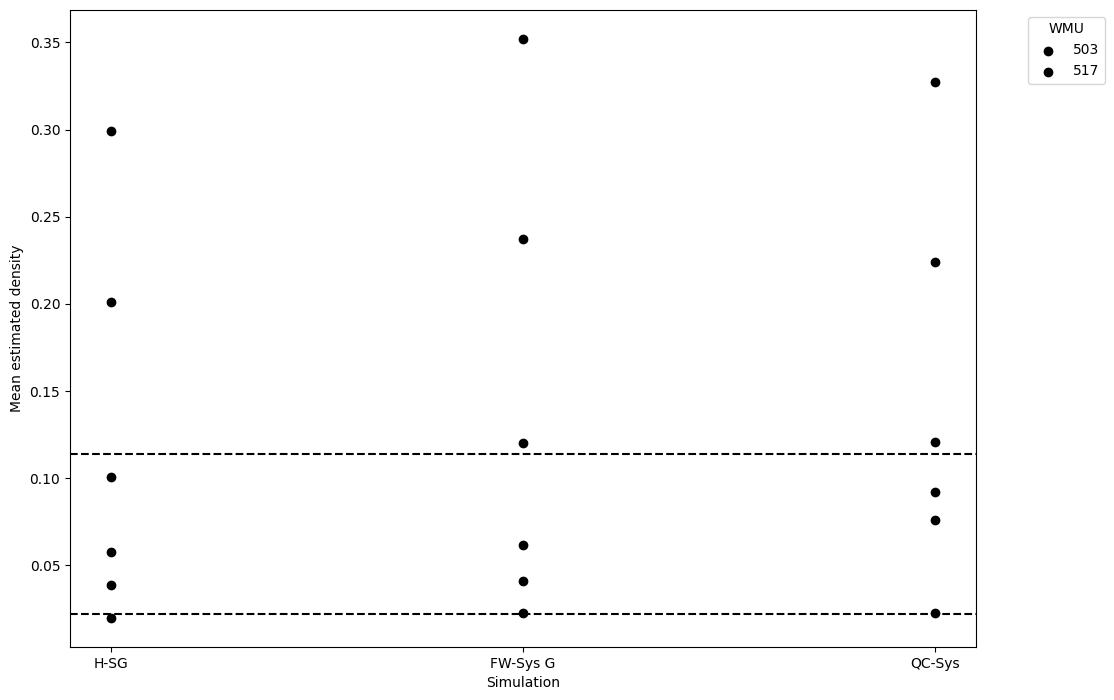

In [29]:
# Predefined colors for each WMU
wmu_colors = {
    'WMU501': '#fb9a99',   # Pink
    'WMU503': '#a6cee3',  # light Blue
    'WMU512': '#33a02c',  # Green
    'WMU517': '#b2df8a',  # light Green
    'WMU528': '#1f78b4'  # Blue
}

# Custom legend labels
wmu_labels = {
    'WMU501': '501',
    'WMU503': '503',
    'WMU512': '512',
    'WMU517': '517',
    'WMU528': '528'
}

# Plotting
fig, ax = plt.subplots(figsize=(11.69, 8.27))  # A4 size in landscape orientation

# Group by WMU and plot each group
for key, grp in df.groupby('WMU'):
    color = wmu_colors.get(key, '#000000')  # Default to black if WMU not found
    label = wmu_labels.get(key, key)  # Use custom label if available, otherwise use key
    ax.scatter(grp['Simulation'], grp['Mean estimated Density'], label=label, color=color)
    true_density = grp['True Density'].iloc[0]  # Assuming True Density is the same for each group
    ax.axhline(y=true_density, linestyle='--', color=color, label='_nolegend_')

# Adding labels and title
ax.set_xlabel('Simulation')
ax.set_ylabel('Mean estimated density')
# ax.set_title('Scatter Plot of Simulation vs Mean estimated Density')
# Place legend outside the plot
ax.legend(title='WMU', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.show()